In [25]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# import data which is already filtered using the 01_filter_data.ipynb file
df = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Data-Analysis-2/main/data/loan_data.csv')

---
# 00. EDA
--- 

In [4]:
df.head()

,geo_name,geo_level,race_or_ethnicity,gender,veteran,number_of_loans,loan_amount,quartiles_number_of_loans,quartiles_loan_amount,percentile_number_of_loans,percentile_loan_amount,pct_black_alone
0,Montana,state,Hispanic,Female Owned,Veteran,8,376256,Bottom 25% of geographies,26-50% of geographies,22,30,0.6
1,Arizona,state,White,Male Owned,Non-Veteran,10472,947717925,26-50% of geographies,51-75% of geographies,48,60,4.5
2,Montana,state,Hispanic,Female Owned,Non-Veteran,96,2776646,Bottom 25% of geographies,Bottom 25% of geographies,12,10,0.6
3,Nebraska,state,Hispanic,Male Owned,Non-Veteran,606,23311905,26-50% of geographies,26-50% of geographies,40,26,4.8
4,Louisiana,state,Asian,Male Owned,Veteran,13,403325,26-50% of geographies,26-50% of geographies,41,37,31.9


In [9]:
print(f"I have {df.shape[0]} rows and {df.shape[1]} columns in my dataset.")

I have 807 rows and 12 columns in my dataset.


In [7]:
# look at columns
df.columns

Index(['geo_name', 'geo_level', 'race_or_ethnicity', 'gender', 'veteran',
       'number_of_loans', 'loan_amount', 'quartiles_number_of_loans',
       'quartiles_loan_amount', 'percentile_number_of_loans',
       'percentile_loan_amount', 'pct_black_alone'],
      dtype='object')

In [6]:
# look at null values
df.isnull().sum()

geo_name                      0
geo_level                     0
race_or_ethnicity             0
gender                        0
veteran                       0
number_of_loans               0
loan_amount                   0
quartiles_number_of_loans     0
quartiles_loan_amount         0
percentile_number_of_loans    0
percentile_loan_amount        0
pct_black_alone               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   geo_name                    807 non-null    object 
 1   geo_level                   807 non-null    object 
 2   race_or_ethnicity           807 non-null    object 
 3   gender                      807 non-null    object 
 4   veteran                     807 non-null    object 
 5   number_of_loans             807 non-null    int64  
 6   loan_amount                 807 non-null    int64  
 7   quartiles_number_of_loans   807 non-null    object 
 8   quartiles_loan_amount       807 non-null    object 
 9   percentile_number_of_loans  807 non-null    int64  
 10  percentile_loan_amount      807 non-null    int64  
 11  pct_black_alone             807 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 75.8+ KB


In [11]:
# look at value counts for each column
for col in df.columns:
    print(df[col].value_counts())
    print('-------------------')

Montana                 16
North Carolina          16
Kentucky                16
South Carolina          16
New Mexico              16
Hawaii                  16
Colorado                16
Florida                 16
New Jersey              16
Alabama                 16
Georgia                 16
California              16
Washington              16
Pennsylvania            16
Massachusetts           16
New York                16
Ohio                    16
Oregon                  16
Mississippi             16
Illinois                16
West Virginia           16
Indiana                 16
Arkansas                16
Arizona                 16
Tennessee               16
Nevada                  16
South Dakota            16
Nebraska                16
Louisiana               16
Kansas                  16
Connecticut             16
Idaho                   16
Michigan                16
Virginia                16
Utah                    16
Maryland                16
District of Columbia    16
T

In [15]:
# look at the unique values of each column
for col in df.columns:
    print(col, df[col].nunique())

geo_name 51
geo_level 1
race_or_ethnicity 4
gender 2
veteran 2
number_of_loans 577
loan_amount 807
quartiles_number_of_loans 4
quartiles_loan_amount 4
percentile_number_of_loans 90
percentile_loan_amount 91
pct_black_alone 49


In [16]:
df.describe()

,number_of_loans,loan_amount,percentile_number_of_loans,percentile_loan_amount,pct_black_alone
count,807.000000,8.070000e+02,807.000000,807.000000,807.000000
mean,3014.047088,1.625656e+08,49.784387,50.000000,11.270012
std,7259.171822,5.263416e+08,29.641708,29.477333,10.408518
min,1.000000,3.010000e+02,0.000000,0.000000,0.600000
25%,53.500000,1.992810e+06,24.000000,24.000000,3.400000
50%,339.000000,1.562447e+07,50.000000,50.000000,7.300000
75%,1949.500000,9.952855e+07,76.000000,76.000000,15.200000
max,73256.000000,8.835301e+09,100.000000,100.000000,44.700000


## Look at loan amount as our dependant variable

In [130]:
# Log transform the loan_amount column
df['log_loan_amount'] = df['loan_amount'].apply(lambda x: np.log10(x))

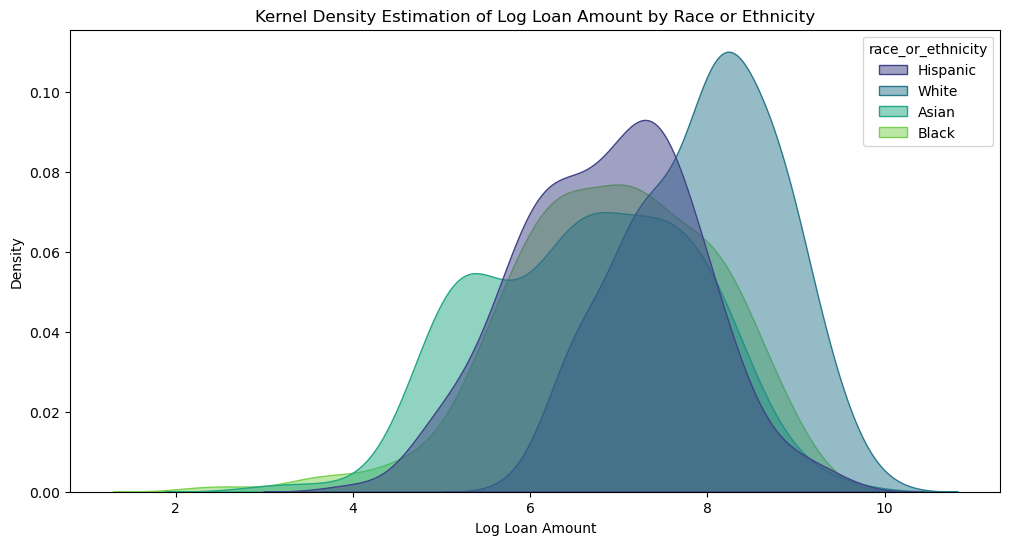

In [131]:
# Setting up the figure
plt.figure(figsize=(12, 6))

# Create the KDE plot
sns.kdeplot(data=df, x='log_loan_amount', hue='race_or_ethnicity', 
            palette='viridis',  # Color palette
            fill=True,  # Fill the area under the curve
            alpha=0.5)  # transparency

# Set labels and title
plt.xlabel('Log Loan Amount')
plt.title('Kernel Density Estimation of Log Loan Amount by Race or Ethnicity')

# Show the plot
plt.show()

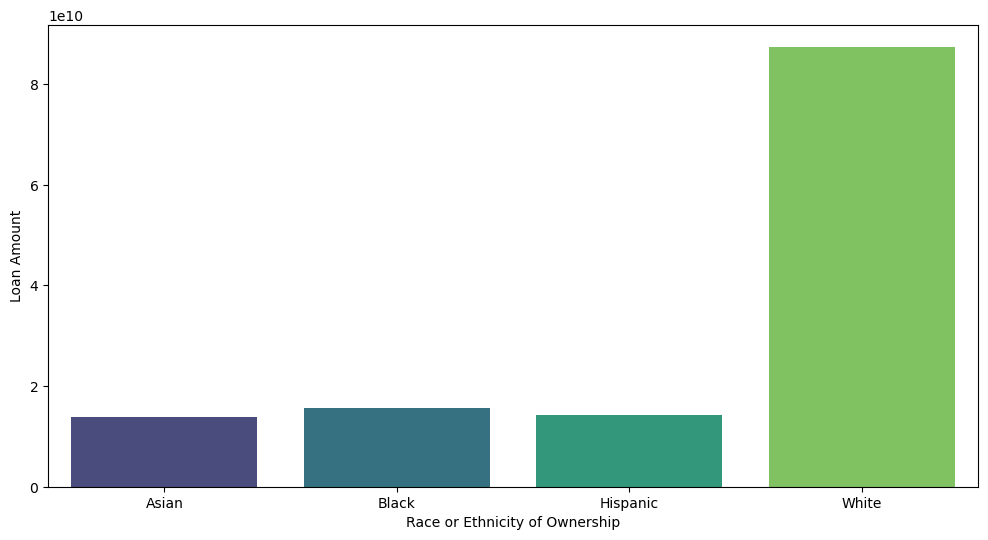

In [61]:
by_ethnicity = df.groupby(by='race_or_ethnicity').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_ethnicity,x='race_or_ethnicity',y=('loan_amount','sum'),palette='viridis')

plt.xlabel('Race or Ethnicity of Ownership')
plt.ylabel('Loan Amount')

plt.show()

In [63]:
# Assumption from EDA and research question: Businesses with white ownership are more likely to get a loan than businesses with other ethnic ownerships.

## Look at controlling variables

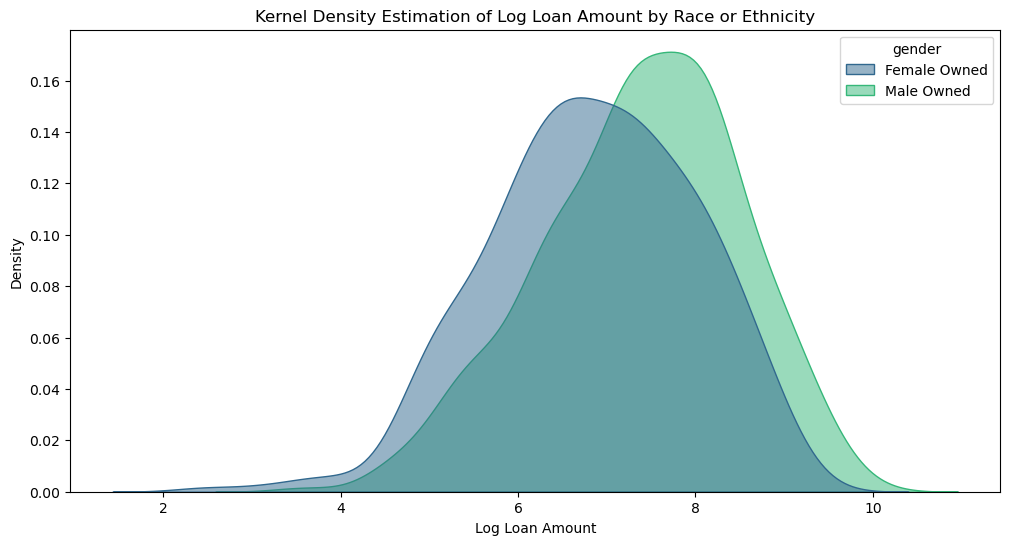

In [85]:
# Setting up the figure
plt.figure(figsize=(12, 6))

# Create the KDE plot
sns.kdeplot(data=df, x='log_loan_amount', hue='gender',
            palette='viridis',  # Color palette
            fill=True,  # Fill the area under the curve
            alpha=0.5)  # transparency

# Set labels and title
plt.xlabel('Log Loan Amount')
plt.title('Kernel Density Estimation of Log Loan Amount by Race or Ethnicity')

# Show the plot
plt.show()

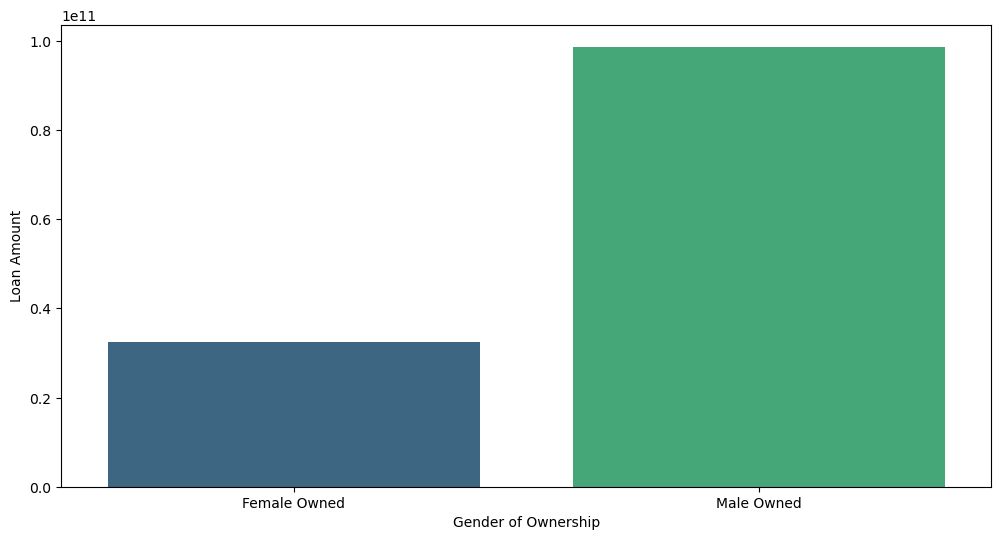

In [71]:
by_gender = df.groupby(by='gender').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_gender, x='gender', y=('loan_amount', 'sum'), palette='viridis')

plt.xlabel('Gender of Ownership')
plt.ylabel('Loan Amount')

plt.show()

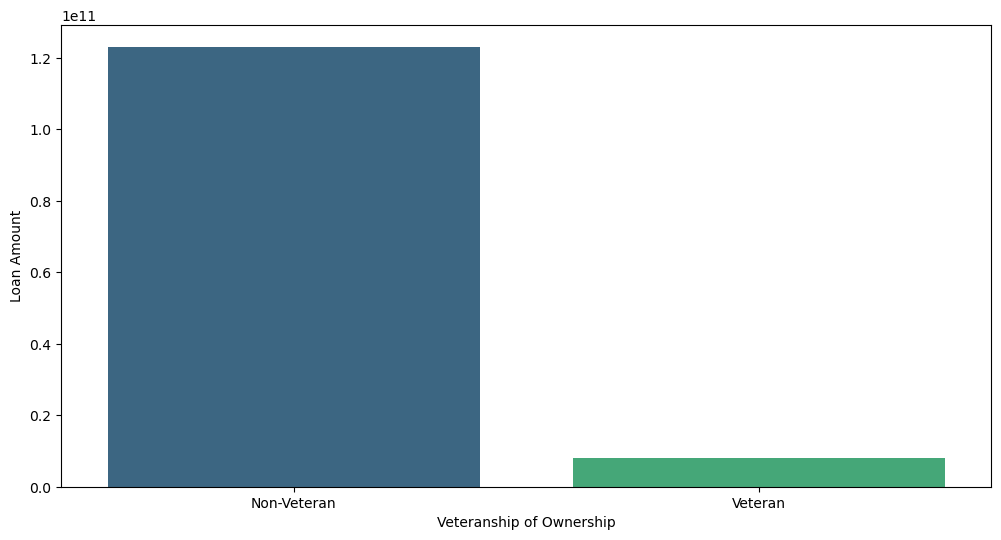

In [74]:
by_veteranship = df.groupby(by='veteran').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_veteranship, x='veteran', y=('loan_amount', 'sum'), palette='viridis')

plt.xlabel('Veteranship of Ownership')
plt.ylabel('Loan Amount')

plt.show()

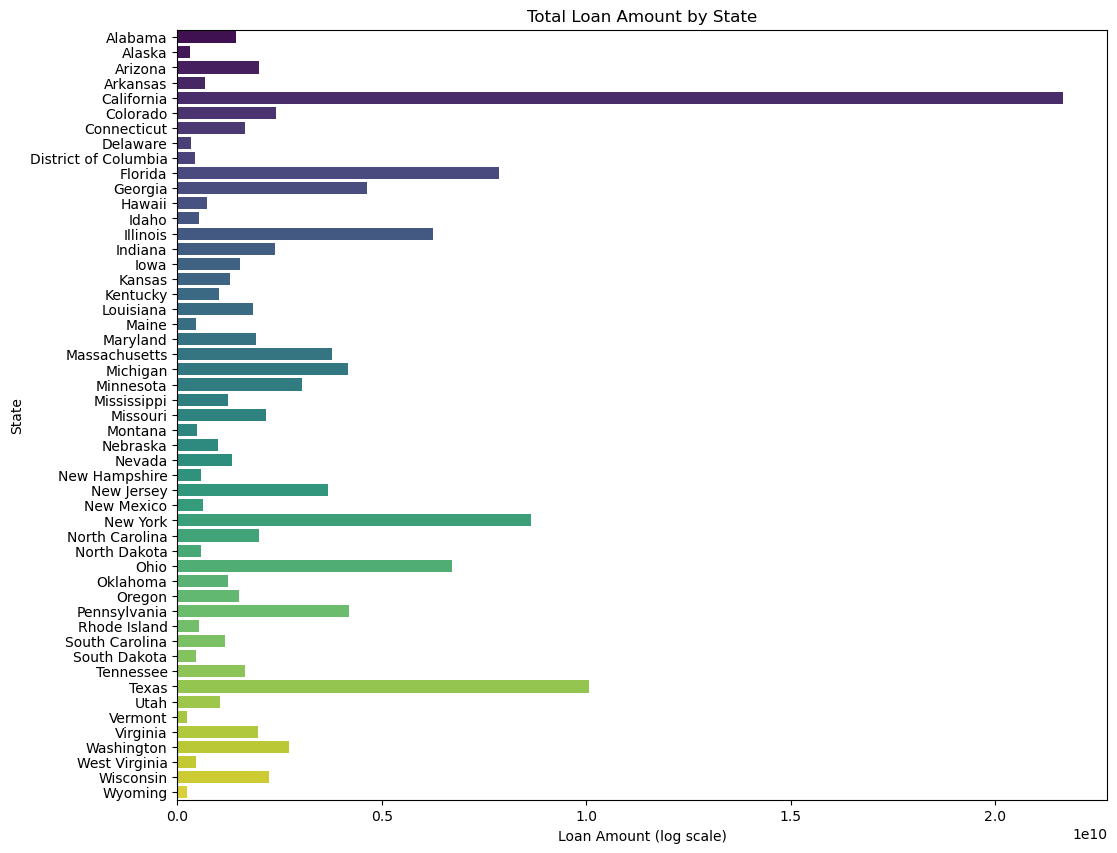

In [107]:
by_state = df.groupby(by='geo_name').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 10))

# Create the barplot
sns.barplot(data=by_state, y='geo_name', x=('loan_amount', 'sum'), 
            orient='h',
            palette='viridis')

plt.xlabel('Loan Amount (log scale)')
plt.ylabel('State')
plt.title('Total Loan Amount by State')

plt.show()


In [148]:
by_state = df.groupby(by='geo_name').aggregate({'log_loan_amount': ['sum']}).droplevel(0, axis=1).reset_index()

# Create the barplot with continuous color scaling using Plotly Express
fig = px.bar(by_state, 
             x='sum',
             y='geo_name', 
             orientation='h',
             color='sum',  # Use log_loan_amount for continuous color scaling
             color_continuous_scale='viridis',  # Use 'viridis' color scale
             labels={'geo_name': 'State', 'loan_amount': 'Loan Amount (log scale)'},
             title='Total Log Loan Amount by State',
             template ='simple_white')

fig.update_layout(height=1200, width=1000)

fig.show()

In [153]:
# Create the barplot with continuous color scaling using Plotly Express
by_pct_blck = df.groupby(by='geo_name').aggregate({'log_loan_amount': 'sum','pct_black_alone':'mean'}).reset_index()

fig = px.bar(by_pct_blck, 
             x='pct_black_alone',
             y='geo_name', 
             orientation='h',
             color='pct_black_alone',  # Use log_loan_amount for continuous color scaling
             color_continuous_scale='viridis',  # Use 'viridis' color scale
             labels={'geo_name': 'State', 'loan_amount': 'Loan Amount (log scale)'},
             title='Total Log Loan Amount by State',
             template ='simple_white')

fig.update_layout(height=1200, width=1000)

fig.show()

In [140]:
# creating dummy variables
# for white owned businesses
df['white_owned'] = df['race_or_ethnicity'].apply(lambda x: 1 if x == 'White' else 0)

# for male owned businesses
df['male_owned'] = df['gender'].apply(lambda x: 1 if x == 'Male Owned' else 0)

# for Non-Veteran owned businesses
df['Non-veteran_owned'] = df['veteran'].apply(lambda x: 1 if x == 'Non-Veteran' else 0)

In [141]:
df

,geo_name,geo_level,race_or_ethnicity,gender,veteran,number_of_loans,loan_amount,quartiles_number_of_loans,quartiles_loan_amount,percentile_number_of_loans,percentile_loan_amount,pct_black_alone,log_loan_amount,white_owned,male_owned,Non-veteran_owned
0,Montana,state,Hispanic,Female Owned,Veteran,8,376256,Bottom 25% of geographies,26-50% of geographies,22,30,0.6,5.575483,0,0,0
1,Arizona,state,White,Male Owned,Non-Veteran,10472,947717925,26-50% of geographies,51-75% of geographies,48,60,4.5,8.976679,1,1,1
2,Montana,state,Hispanic,Female Owned,Non-Veteran,96,2776646,Bottom 25% of geographies,Bottom 25% of geographies,12,10,0.6,6.443521,0,0,1
3,Nebraska,state,Hispanic,Male Owned,Non-Veteran,606,23311905,26-50% of geographies,26-50% of geographies,40,26,4.8,7.367578,0,1,1
4,Louisiana,state,Asian,Male Owned,Veteran,13,403325,26-50% of geographies,26-50% of geographies,41,37,31.9,5.605655,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,District of Columbia,state,Black,Female Owned,Veteran,45,1084029,26-50% of geographies,26-50% of geographies,49,49,44.7,6.035041,0,0,0
803,Illinois,state,White,Male Owned,Non-Veteran,34747,2575025218,Top 25% of geographies,Top 25% of geographies,92,90,14.1,9.410781,1,1,1
804,Nevada,state,White,Female Owned,Veteran,137,5212800,26-50% of geographies,26-50% of geographies,34,40,9.3,6.717071,1,0,0
805,Connecticut,state,Black,Female Owned,Non-Veteran,1080,19429923,26-50% of geographies,26-50% of geographies,40,38,10.8,7.288471,0,0,1


In [ ]:
88